# **Gradiente**

## Função Custo

Em geral o FWI visa obter um conjunto de parâmetros do subsolo, o qual é representado por um vetor $\vec{m}$. Os parâmetros mais usados são as velocidades de propagação da onda *P*, mas em geral, pode ser calculado também as densidades das rochas, velocidades de ondas *S* e fatores de atenuação em cada ponto do subsolo.

A suposição principal é que o modelo correto é aquele que minimiza uma função $\Phi=\Phi(\textbf{u}(\vec{m}),\textbf{d}_{obs})$ a qual compara os dados observados no campo $\textbf{d}_{obs}$ com dados simulados no computador $u$ os quais dependem de $\vec{m}$. A função $\Phi$ é chamada de *função custo* ou *função de desajuste* e é um número escalar.

A função custo em geral esta definida:

\begin{alignat}{3}
  \Phi \colon \mathbb{R}^M &\to \mathbb{R}^N \to \mathbb{R} \\
  \vec{m} &\to \textbf{u}(\vec{m}) \to \Phi(\textbf{u}(\vec{m})).
\end{alignat}

Onde M é o número de elementos do modelo e N é o número de elementos que tem o vetor de dados. Os valores aproximados de M e N são $M \approx 10^4$ e $N \approx 10^6$.

A função custo mais usada e que poderia se chamar de FWI clássico é o quadrado da norma L2 onde os dados simulados no computador são subtraidos dos dados reais e os elementos do vetor resultante são elevados ao quadrado e somados. Esta função é definida como

\begin{equation}
\Phi_{L2}=\frac{1}{2}\sum_{i=1}^{N_s}||\textbf{u}(\vec{m})-\textbf{d}||^2_2
\end{equation}

Onde a soma é feita ao longo dos $N_s$ experimentos sísmicos ou fontes.

## Otimizando uma função de varias variáveis

Obter o mínimo de uma função de varias variaveis sem conhecer a forma analítica dela, ou seja, obter o mínimo numericamente, está relacionado com o ramo da matemática chamado **otimização não linear**. Para analizar como fazer isto deve se escolher um ponto inicial $\vec{m}_0$ e fazer correções dele segundo o comportamento da função a minimizar. Para entender isto vamos fazer uma expansão em serie de Taylor ao redor do punto $\vec{m}_0$ aplicando uma correção $\Delta \vec{m}$. Isto seria

\begin{equation}  \Phi(\vec{m}_0+\Delta\vec{m} )=\Phi(\vec{m}_0)+\sum_{i=1}^M \frac{\partial \Phi (\vec{m}_0)}{\partial m_i }\Delta m_i +\frac{1}{2}\sum_{i=1}^M\sum_{j=1}^M\frac{\partial^2 \Phi (\vec{m}_0)}{\partial m_i \partial m_j}\Delta m_i\Delta m_j +\mathcal{O}(\vec{m}^3)\end{equation}

Derivando esta equação com relação a uma componente genérica qualquer $m_k$ e desprezando os termos de terceira ordem na derivada é obtido que

\begin{equation}  \frac{\partial  \Phi(\vec{m}_0+\Delta\vec{m} )}{\partial m_k}= \frac{\partial  \Phi(\vec{m}_0)}{\partial m_k} + \sum_{i=1}^M \frac{\partial^2 \Phi (\vec{m}_0)}{\partial m_i \partial m_k}\Delta m_i \end{equation}

Como a correção $\Delta \vec{m}$ deve fazer com que a função caia num mínimo, então o termo do lado esquerdo deve ser zero e por tanto

\begin{equation}  0 = \frac{\partial  \Phi(\vec{m}_0)}{\partial m_k} + \sum_{i=1}^M \frac{\partial^2 \Phi (\vec{m}_0)}{\partial m_i \partial m_k}\Delta m_i \end{equation}

Escrevendo em forma vetorial a equação anterior fica como

\begin{equation}  \left(\frac{\partial  \Phi(\vec{m}_0)}{\partial \vec{m}}\right)_{M\times 1} + \mathcal{H}_{M\times M}\left(\Delta \vec{m}\right)_{M\times 1}  =0\end{equation}

Onde $\mathcal{H}_{ij}=\frac{\partial^2 \Phi (\vec{m}_0)}{\partial m_i \partial m_k}$ é conhecida como a matriz **Hessiana** e $\left(\frac{\partial  \Phi(\vec{m}_0)}{\partial \vec{m}}\right)$ é o **gradiente** da função custo no ponto inicial. Os subíndices representam as dimensões das matrices. Da última equação pode-se calcular o termo de correção como

\begin{equation}
\boxed{\Delta \vec{m} = -\mathcal{H}^{-1}\left(\frac{\partial  \Phi(\vec{m}_0)}{\partial \vec{m}}\right)}
\end{equation}

A qual constitui a equação mais importante da otimização não linear. Em geral, a otimização é feito através de um processo iterativo onde um nova interação é calculada apartir da última usando a seguinte equação

\begin{equation} \vec{m}_{k+1}=\vec{m}_k-\alpha  \mathcal{H}^{-1}\left(\frac{\partial  \Phi(\vec{m}_k)}{\partial \vec{m}}\right)\end{equation}

Onde $\alpha$ é conhecido como **tamanho do passo** e é um ajuste do vetor de correção que visa minimizar a função mais rapidamente.

## Dimensão do gradiente e da Hessiana

O vetor gradiente possui o tamanho do modelo, ou seja $M\approx 10^4$. A Hessiana no caso possui $M^2 \approx 10^8$. Do ponto de vista computacional, um gradiente ocuparia aproximadamente 10Mb, enquanto que uma matriz hessiana ocuparia 100Gb, o qual torna o problema de calcular a Hessiana inviável. Em gera, no FWI, é calculado o gradiente e o efeito da Hessiana sobre o gradiente é estimado através dos métodos baseados no gradiente ou nos métodos quase-Newton. Portanto, a quantidade mais importante a ser calculada é o gradiente

## Cálculo do gradiente

Como a função custo é composta, o gradiente deve ser calculado usando a regra da cadeia da seguinte forma

\begin{equation}  \left(\frac{\partial  \Phi(\textbf{u}(\vec{m}))}{\partial \vec{m}}\right)_{M\times 1}=\left(\frac{\partial  \textbf{u}}{\partial \vec{m}} \right)_{M\times N}\left(\frac{\partial \Phi(\textbf{u}(\vec{m})) }{\partial \textbf{u}} \right)_{N\times 1} \end{equation}

A matriz $\left(\frac{\partial  \textbf{u}}{\partial \vec{m}} \right)$ é conhecida como *Jacobiana* ou *derivada de Frechet* ou *sensibilidade*. O cálculo direto dessa matriz implica um custo computacional muito grande. Em diferenças finitas isto implicaria fazer $M$ propagações de onda o qual tornaria o cálculo do gradiente muito caro.

Existe um método para simplificar o cálculo do gradiente é usado o vínculo que o campo de onda $\textbf{u}$ satisfaz a equação de onda

\begin{equation} (L)_{N\times N} \textbf{u}_{N\times 1}=\textbf{s}_{N\times 1} \end{equation}

Onde $\textbf{s}$ é um vetor que representa a fonte, $N$ é uma representação matricial do operador de propagação de onda. No caso da equaçào de onda acústica com densidade constante isto é 

\begin{equation} L=m \frac{\partial ^2}{\partial t^2}-\nabla ^2\end{equation}

Onde $m=1/v^2$ é o inverso do quadrado da velocidade e $\nabla^2$ é o operador laplaciano. Nesse caso foi o inverso do quadrado da velocidade foi escolhido como as variáveis do modelo $\vec{m}$

Derivando a equação de onda com relação a $\vec{m}$ é obtido que

\begin{equation} (L)_{N\times N} \left(\frac{\partial  \textbf{u}}{\partial \vec{m}}\right)^{T}_{N\times M}+\left(\frac{\partial  L}{\partial \vec{m}}\right)_{N\times M \times N} \textbf{u}_{N\times 1}=0\end{equation}

O supraíndice $T$ representa o transposto da matriz. A matriz cúbica $\left(\frac{\partial  L}{\partial \vec{m}}\right)_{N\times M \times N}$ é uma matriz altamente esparsa e é facil de calcular analíticamente diretamente da definição do operador. Deixando em evidencia a matriz jacobiana da equação anterior fica como

\begin{equation} \left(\frac{\partial  \textbf{u}}{\partial \vec{m}}\right)_{M\times N}=-\left(\left(\frac{\partial  L}{\partial \vec{m}}\right)_{N\times M \times N} \textbf{u}_{N\times 1}\right)^T (L^{-1})_{N\times N}^{T}\end{equation}

Substituindo no cálculo original do gradiente é obtido que 

\begin{equation} \left(\frac{\partial  \Phi(\textbf{u}(\vec{m}))}{\partial \vec{m}}\right)_{M\times 1}=- \left(\left(\frac{\partial  L}{\partial \vec{m}}\right)_{N\times M \times N} \textbf{u}_{N\times 1}\right)^T (L^{-1})_{N\times N}^{T}\left(\frac{\partial \Phi(\textbf{u}(\vec{m})) }{\partial \textbf{u}} \right)_{N\times 1} \end{equation}

## Campo adjunto

O termo $(L^{-1})_{N\times N}^{T}\left(\frac{\partial \Phi(\textbf{u}(\vec{m})) }{\partial \textbf{u}} \right)_{N\times 1}$ é chamado de **campo adjunto** $\textbf{q}$ e pode ser calculado reinterpretando sua definição

\begin{equation}
\textbf{q}=(L^{-1})_{N\times N}^{T}\left(\frac{\partial \Phi(\textbf{u}(\vec{m})) }{\partial \textbf{u}} \right)_{N\times 1}
\end{equation}
Aplicando o inverso do campo 
\begin{equation}
L\textbf{q}=\left(\left(\frac{\partial \Phi(\textbf{u}(\vec{m})) }{\partial \textbf{u}} \right)_{N\times 1}\right)^T
\end{equation}

Ou seja, o campo adjunto é calculado como um campo de onda cuja fonte é o transposto do campo $\frac{\partial \Phi(\textbf{u}(\vec{m})) }{\partial \textbf{u}}$

A continuação vamos ver esse conceito com o FWI no dominio do tempo e a norma L2.

## Gradiente da norma L2 para o o inverso da velocidade ao quadrado

Da equação que define o operador de onda pode ser calculado o termo $\left(\frac{\partial  L}{\partial \vec{m}}\right)$ como

\begin{equation}\left(\frac{\partial  L}{\partial \vec{m}}\right)=\frac{\partial ^2}{\partial t^2} \end{equation}

Da definição da norma L2 pode ser calculado o termo $\frac{\partial \Phi(\textbf{u}(\vec{m})) }{\partial \textbf{u}}$ como

\begin{equation} \frac{\partial \Phi(\textbf{u}(\vec{m})) }{\partial \textbf{u}}=\textbf{u}-\textbf{d}\end{equation}

A transposição desse vetor no dominio do tempo é calculado como uma inversão do domínio temporal. Ou seja, a fonte é injetada no propagador em direção reversa no tempo. Substituindo essas quantidades na definição de gradiente é obtido o seguinte

\begin{equation} \left(\frac{\partial  \Phi(\textbf{u}(\vec{m}))}{\partial \vec{m}}\right)_{M\times 1}= -\frac{\partial ^2\textbf{u}}{\partial t^2}\textbf{q} \end{equation}

onde $\textbf{q}$ é calculado com a equação

\begin{equation}
L\textbf{q}=(\textbf{u}-\textbf{d})^T
\end{equation}

Na linguagem do FWI a propagação reversa no tempo é conhecida como **retropropagação**, portanto, se diz que o campo adjunto é calculado como a retropagação das diferenças entre o dado calculado e o dado observado. O produto de $\frac{\partial ^2\textbf{u}}{\partial t^2}$ e $\textbf{q}$ e feito para cada ponto do modelo somando ao longo de todos os tempos. A expressão do gradiente calculado desta forma implica somente duas propagações de onda. Uma para calcular o campo direto $\textbf{u}$ e uma outra para calcular o campo adjunto $\textbf{q}$, o qual é muito mais rápido que o cálculo por diferenças finitas. 

## Receita para o cálculo do gradiente

A receita para calcular o gradiente seria a seguinte.

1. Calcule um campo direto $\textbf{u}$ propagando uma wavelet sintética e salve as segunda derivada do campo de onda em todos os instantes.
2. Simultaneamente vai guardando o campo na superfície e vai fazendo a diferença $\textbf{u}-\textbf{d}$.
3. Uma vez terminado o cálculo do campo direto, faça o cálculo do campo reverso e vai multiplicando pelo campo direto calculado.
4. Uma vez que calculou o produto dos campo faça a soma para cada ponto do modelo ao longo do tempo.
5. Por último multiplique por um sinal $-$ e esse é o resultado do gradiente.

A seguir vai ser mostrado um código em python para calcular o gradiente

In [63]:
#importar as bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
import time

In [64]:
#definição das funções necessárias para a propagação
def ricker(f,dt,amostras):
    t0=6/(np.pi*f*np.sqrt(2))
    tricker=np.arange(0,dt*(amostras),dt)
    rickeramp=(1-2*np.pi**2*f**2*(tricker-t0)**2)*np.exp(-np.pi**2*f**2*(tricker-t0)**2)
    return rickeramp

def laplaciano(onda,dx,dz):
    dp_dzz=(-np.roll(onda,2,axis=0)+16*np.roll(onda,1,axis=0)+16*np.roll(onda,-1,axis=0)-\
            np.roll(onda,-2,axis=0)-30*onda)/(12.0*dz**2) #cálculo da segunda derivada em z
    dp_dzz[0,:]=dp_dzz[1,:]=(onda[0,:]-2*onda[1,:]+onda[2,:])/(dz**2)#cálculo da segunda derivada em z para as duas primeiras linhas
    dp_dzz[-1,:]=dp_dzz[-2,:]=(onda[-1,:]-2*onda[-2,:]+onda[-3,:])/(dz**2)#cálculo da segunda derivada em z para as duas últimas linhas
    dp_dxx=(-np.roll(onda,2,axis=1)+16*np.roll(onda,1,axis=1)+\
            16*np.roll(onda,-1,axis=1)-np.roll(onda,-2,axis=1)-30*onda)/(12.0*dx**2)#cálculo da segunda derivada em x
    dp_dxx[:,0]=dp_dxx[:,1]=(onda[:,0]-2*onda[:,1]+onda[:,2])/(dx**2)#cálculo da segunda derivada em z para as duas primeiras colunas
    dp_dxx[:,-1]=dp_dxx[:,-2]=(onda[:,-1]-2*onda[:,-2]+onda[:,-3])/(dx**2)#cálculo da segunda derivada em z para as duas últimas colunas
    return dp_dxx+dp_dzz

def estendermodelo(vel,borda):
    (nz,nx)=np.shape(vel)
    nxa=nx+2*borda
    nza=nz+2*borda
    modelo=np.zeros((nza,nxa))
    modelo[borda:borda+nz,borda:borda+nx]=vel
    recheio=vel[:,0];
    for i in range(0,borda):
        modelo[borda:borda+nz,i]=recheio
    recheio=vel[:,nx-1]
    for i in range(borda+nx,nxa):
        modelo[borda:borda+nz,i]=recheio
    recheio=modelo[borda,:]
    for i in range(0,borda):
        modelo[i,:]=recheio
    recheio=modelo[borda+nz-1,:]
    for i in range(borda+nz,nza):
        modelo[i,:]=recheio
    return modelo

def taper(nz,nx,borda):
    damp=6.5*borda
    nxa=nx+2*borda
    nza=nz+2*borda
    amortece=np.ones((nza,nxa))
    for i in range(0,borda):
        amortece[i,:]=amortece[-1-i,:]=0.5*(1+np.cos(np.pi*(borda-i)/damp))
    for i in range(0,borda):
        amortece[:,i]=amortece[:,i]*0.5*(1+np.cos(np.pi*(borda-i)/damp))
        amortece[:,-1-i]=amortece[:,-1-i]*0.5*(1+np.cos(np.pi*(borda-i)/damp))
    return amortece

def propagador(wavelet,dt,amostras,soux,souz,recz,vel,dx,dz,borda):
    (nz,nx)=np.shape(vel)
    nxa=nx+2*borda
    nza=nz+2*borda
    vel1=estendermodelo(vel,borda)
    amortecedor=taper(nz,nx,borda)
    onda0=np.zeros((nza,nxa))
    onda1=np.zeros((nza,nxa))
    onda2=np.zeros((nza,nxa))
    tiro=np.zeros((amostras,nx))
    con=(vel1*dt)**2
    for t in range(amostras):
        onda2=2*onda1-onda0+con*laplaciano(onda1,dx,dz)
        onda2[souz+borda,soux+borda]=onda2[souz+borda,soux+borda]+con[souz+borda,soux+borda]*wavelet[t]
        tiro[t,:]=onda2[borda+recz,borda:borda+nx]
        onda0=onda1*amortecedor
        onda1=onda2*amortecedor
    return tiro

In [65]:
#criação de dado observado
nx=161
nz=61
dt=0.002
dx=25
dz=25
amostras=600 
soux=50
souz=5
borda=100
recz=5
f=12
vel=np.ones((nz,nx))*3000
for i in range(nz):
    vel[i,:]=3000+i*3000/nz
wavelet=ricker(f,dt,amostras)
tic=time.time()
tiro=propagador(wavelet,dt,amostras,soux,souz,recz,vel,dx,dz,borda)
toc=time.time()
print('demorei ',toc-tic,' segundos')

demorei  1.2344329357147217  segundos


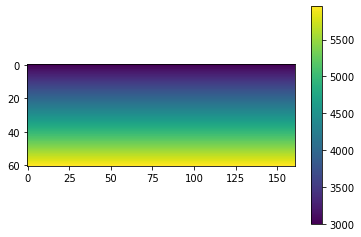

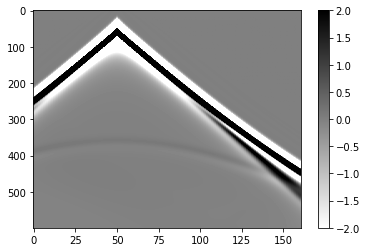

In [66]:
plt.figure();plt.imshow(vel);plt.colorbar()
plt.figure();plt.imshow(tiro,aspect='auto',cmap='binary');plt.clim(-2,2);plt.colorbar()

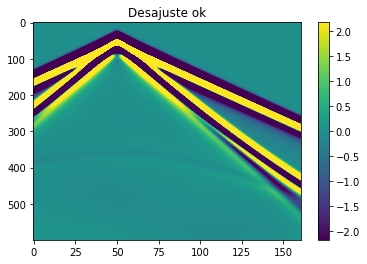

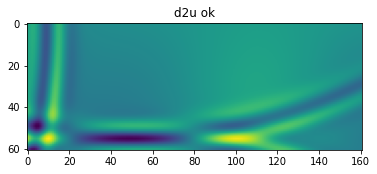

demorei  1.5803306102752686  segundos
demorei  1.5311286449432373  segundos


In [67]:
#calculo do gradiente
v0=np.ones((nz,nx))*6000.0
reamos=5
amostrasr=amostras//reamos
nxa=nx+2*borda
nza=nz+2*borda

amortecedor=taper(nz,nx,borda)
onda0=np.zeros((nza,nxa))
onda1=np.zeros((nza,nxa))
onda2=np.zeros((nza,nxa))
d2u=np.zeros((nz,nx,amostrasr))
vel0=estendermodelo(v0,borda)
con=(vel0*dt)**2
desajuste=np.zeros((amostras,nx))
tic=time.time()
tamos=0
#passo 1
for t in range(0,amostras):
    onda2=2*onda1-onda0+con*laplaciano(onda1,dx,dz)
    onda2[souz+borda,soux+borda]=onda2[souz+borda,soux+borda]+con[souz+borda,soux+borda]*wavelet[t]
    if t%reamos==0:
        d2u[:,:,tamos]=(onda2[borda:borda+nz,borda:borda+nx]-2*onda1[borda:borda+nz,borda:borda+nx]+onda0[borda:borda+nz,borda:borda+nx])/dt**2
        tamos=tamos+1
    onda0=onda1*amortecedor
    onda1=onda2*amortecedor
    desajuste[t,:]=onda2[borda+recz,borda:borda+nx]-tiro[t,:]#passo 2

plt.imshow(desajuste, aspect = 'auto')
plt.colorbar()
plt.clim(-desajuste.max()/50, desajuste.max()/50)
plt.title("Desajuste ok")
plt.show()

l = 1
plt.imshow(d2u[:,:,amostrasr-1])
plt.clim(-d2u[:,:,amostrasr-1].max()/l, d2u[:,:,amostrasr-1].max()/l)
plt.title("d2u ok")
plt.show()

toc=time.time()
print('demorei ',toc-tic,' segundos')

onda2=np.zeros((nza,nxa)) 
onda1=np.zeros((nza,nxa))
onda0=np.zeros((nza,nxa)) 
tic=time.time()
tamos=amostrasr-1
for t in range(0,amostras):
    onda2=2*onda1-onda0+con*laplaciano(onda1,dx,dz)
    onda2[borda+recz,borda:borda+nx]=onda2[borda+recz,borda:borda+nx]+con[borda+recz,borda:borda+nx]*desajuste[amostras-t-1,:]
    onda0 = onda1*amortecedor
    onda1 = onda2*amortecedor
    if (amostras-1-t)%reamos==0:
        d2u[:,:,tamos]=d2u[:,:,tamos]*onda2[borda:borda+nz,borda:borda+nx] #passo 3
        tamos=tamos-1


toc=time.time()
print('demorei ',toc-tic,' segundos')
grad=np.sum(d2u,axis=2)*reamos*dt*2/v0**3#passos 4 e 5

0.00011358706151382414


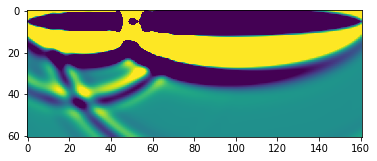

In [68]:
l = 300
plt.imshow(grad);plt.clim(-0.0001,0.0001);
print(grad.max()/l)

## Gradiente de um único traço

O gradiente de um único traço serve para entender a física que esta envolvida no cálculo de gradiente. Esse gradiente é denominado na literatura como **kernel** ou **sensibilidade** ou **função resposta ou ao impulso** do FWI. Como vai ser visto o gradiente possui uma componente de baixa frequência proporcionada pelo caminho da onda ao longo do modelo, e uma componente de alta frequência a qual é originada pela resposta de um difrator ou, como é denominado no processamento sísmico, como operador de migração.

In [69]:
#calculo do gradiente de um único traço
v0=np.ones((nz,nx))*6000.0
reamos=5
amostrasr=amostras//reamos
nxa=nx+2*borda
nza=nz+2*borda
recx=110
sampling=np.zeros(nx)
sampling[recx]=1
amortecedor=taper(nz,nx,borda)
onda0=np.zeros((nza,nxa))
onda1=np.zeros((nza,nxa))
onda2=np.zeros((nza,nxa))
d2u=np.zeros((nz,nx,amostrasr))
vel0=estendermodelo(v0,borda)
con=(vel0*dt)**2
desajuste=np.zeros((amostras,nx))
tic=time.time()
tamos=0
for t in range(0,amostras):
    onda2=2*onda1-onda0+con*laplaciano(onda1,dx,dz)
    onda2[souz+borda,soux+borda]=onda2[souz+borda,soux+borda]+con[souz+borda,soux+borda]*wavelet[t]
    if t%reamos==0:
        d2u[:,:,tamos]=onda2[borda:borda+nz,borda:borda+nx]-2*onda1[borda:borda+nz,borda:borda+nx]+onda0[borda:borda+nz,borda:borda+nx]
        tamos=tamos+1
    onda0=onda1*amortecedor
    onda1=onda2*amortecedor
    desajuste[t,:]=onda2[borda+recz,borda:borda+nx]-tiro[t,:]


toc=time.time()
print('demorei ',toc-tic,' segundos')

onda2=np.zeros((nza,nxa)) 
onda1=np.zeros((nza,nxa))
onda0=np.zeros((nza,nxa)) 
tic=time.time()
tamos=amostrasr-1
for t in range(0,amostras):
    onda2=2*onda1-onda0+con*laplaciano(onda1,dx,dz)
    onda2[borda+recz,borda:borda+nx]=onda2[borda+recz,borda:borda+nx]+sampling*con[borda+recz,borda:borda+nx]*desajuste[amostras-t-1,:]
    onda0 = onda1*amortecedor
    onda1 = onda2*amortecedor
    if (amostras-1-t)%reamos==0:
        d2u[:,:,tamos]=d2u[:,:,tamos]*onda2[borda:borda+nz,borda:borda+nx]
        tamos=tamos-1

toc=time.time()
print('demorei ',toc-tic,' segundos')
grad1=-np.sum(d2u,axis=2)*reamos*dt

demorei  1.212153673171997  segundos
demorei  1.215702772140503  segundos


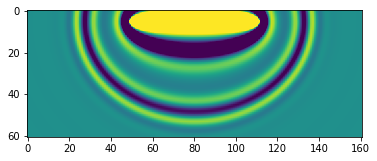

In [70]:
plt.imshow(grad1);plt.clim(-10,10);

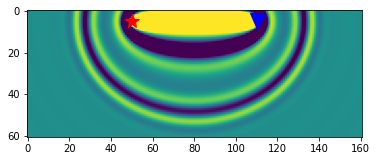

In [71]:
plt.imshow(grad1);plt.clim(-10,10);plt.plot(np.array([soux]),np.array([souz]),'r*',markersize=15)
plt.plot(np.array([recx]),np.array([recz]),'bv',markersize=15)

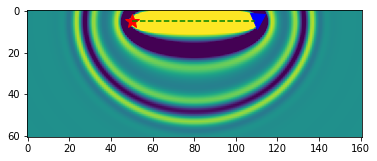

In [72]:
a=np.arange(soux,recx)
b=souz+(a-soux)*(recz-souz)/(recx-soux)
plt.imshow(grad1);plt.clim(-10,10);plt.plot(np.array([soux]),np.array([souz]),'r*',markersize=15)
plt.plot(np.array([recx]),np.array([recz]),'bv',markersize=15);plt.plot(a,b,'--g')

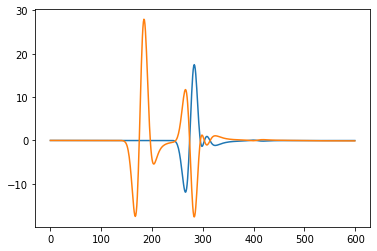

In [73]:
plt.plot(tiro[:,recx]);plt.plot(desajuste[:,recx])

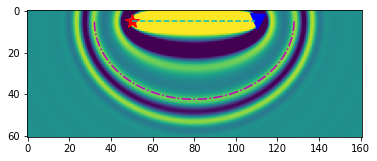

In [74]:
a=np.arange(soux,recx)
b=souz+(a-soux)*(recz-souz)/(recx-soux)
a1=6000*200*dt/2
a2=np.sqrt(a1**2-((recx-soux)*dx/2)**2)
angulo=np.arange(0,np.pi,0.001);operx=a1/dx*np.cos(angulo)+(recx+soux)/2;operz=a2/dz*np.sin(angulo)+souz
plt.imshow(grad1);plt.clim(-10,10);plt.plot(np.array([soux]),np.array([souz]),'r*',markersize=15)
plt.plot(np.array([recx]),np.array([recz]),'bv',markersize=15); #desenho da fonte e o receptor
plt.plot(a,b,'--c'); #desenho da linha de propagação entre a fonte o receptor
plt.plot(operx,operz,'-.m'); #desenho da frente de onda ou da resposta de difração